# Fashion MNIST adathalmaz

[Forrás](https://github.com/zalandoresearch/fashion-mnist)

A Fashion-MNIST Zalando cikkképeinek adathalmaza amely összesen 70 000 mintából áll. Mindegyik minta egy ruhadarabról készült szürkeárnyalatos kép. A képekhez címkék tartoznak, összesen 10 osztályról. Mindegyik kép 28 x 28-as méretű ami összesen 784 képpont. Minden pixelhez egyetlen pixelérték társul, amely jelzi a pixel világosságát vagy sötétségét, a magasabb számok sötétebbet jelentenek. Ez a pixelérték 0 és 255 közötti egész szám.

A címkék 10 osztályból állnak, mint például póló, nardrág, kabát stb...

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# saját osztályok/függények importálása
from src.layers.conv import ConvLayer
from src.layers.dense import DenseLayer
from src.layers.flatten import FlattenLayer
from src.layers.pool import MaxPoolLayer
from src.model import Model
from src.metrics import accuracy_categ_ce
from src.optimizers import gradient_descent
from src.utils import one_hot_enc

In [2]:
# Az adathalmaz elérhető tensorflow-ról
from tensorflow.keras.datasets import fashion_mnist

# 60 000 helyett 2000 képpel dolgoztam, hogy gyorsabb legyen a tanítás
N_TRAIN_SAMPLES = 2000
N_TEST_SAMPLES = 400
N_CLASSES = 10

((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

X_train = trainX[:N_TRAIN_SAMPLES, ...]
y_train = trainY[:N_TRAIN_SAMPLES, ...]
X_test = testX[:N_TEST_SAMPLES, ...]
y_test = testY[:N_TEST_SAMPLES, ...]

# képek előkészítése, hogy megfeleljen a neurális háló által elvárt formátumnak
X_train = np.expand_dims(X_train, axis=3) / 255
y_train = one_hot_enc(y_train)
X_test = np.expand_dims(X_test, axis=3) / 255
y_test = one_hot_enc(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 28, 28, 1) (2000, 10)
(400, 28, 28, 1) (400, 10)


A tanító adathalmaz 2000 képet tartalmaz. Minden kép 28x28 pixelből áll. Mivel szürkeárnyalatos képekről van szó a csatornák száma 1. 
A teszt adathalmaz one-hot-encodolt címkékből áll (10 osztály -> 10 oszlop).

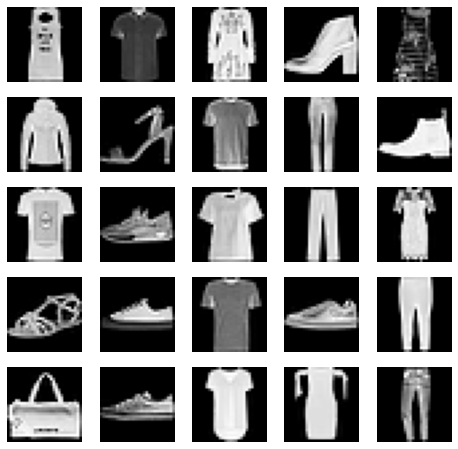

In [3]:
# néhány példa képekre
fig, ax = plt.subplots(5,5, figsize =(8,8))
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[np.random.randint(0,X_train.shape[0]),:,:,0], cmap="gray")
        ax[i,j].axis("off")
plt.show()

## Konvolúciós neurális háló architektúrájának megadása

A képeken 2D konvolúciót hajtok végre amire felhasználom az N-dimenziós konvolúciós réteget, és pooling réteget. Előbb 3x3-mas majd 5x5-ös kernelt használok. Ez után jön két teljesen összekapcsolt réteg. A modellnek 10 kimeneti neuronja van ami megfelel az egyes osztályok valószínűségének

In [4]:
layers = [
    ConvLayer(filters=16, kernel_shape=(3,3,1), activation="relu"),
    MaxPoolLayer(pool_size=(2,2), stride=2),
    ConvLayer(filters=32, kernel_shape=(5 ,5 ,16), activation="relu"),
    MaxPoolLayer(pool_size=(3,3), stride=3),
    FlattenLayer(),
    DenseLayer(nodes_prev=288, nodes_curr=100, activation="relu"),
    DenseLayer(nodes_prev=100, nodes_curr=10, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent,
    costfn="CCE"
)

## Model tanítása

In [5]:
hist = model.fit(X_train,y_train, epoch=10, lr=0.005, batch_size=5)

Iteration: 1	 cost: 1.27517	accuracy: 52.00%
Iteration: 2	 cost: 0.86316	accuracy: 68.85%
Iteration: 3	 cost: 0.74259	accuracy: 72.60%
Iteration: 4	 cost: 0.67282	accuracy: 75.45%
Iteration: 5	 cost: 0.61888	accuracy: 78.00%
Iteration: 6	 cost: 0.57905	accuracy: 79.30%
Iteration: 7	 cost: 0.54832	accuracy: 80.30%
Iteration: 8	 cost: 0.52305	accuracy: 81.15%
Iteration: 9	 cost: 0.49830	accuracy: 82.45%
Iteration: 10	 cost: 0.47809	accuracy: 83.05%


In [6]:
accuracy_categ_ce(y=y_test, y_hat=model.predict(X_test))

0.775

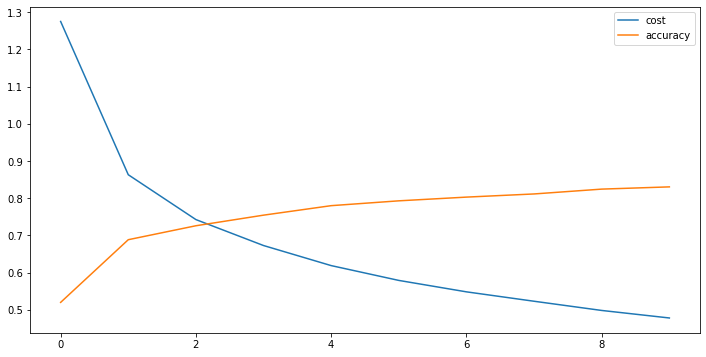

In [7]:
plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()